## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
x=np.linspace(0, 20, num=20)
x

array([ 0.        ,  1.05263158,  2.10526316,  3.15789474,  4.21052632,
        5.26315789,  6.31578947,  7.36842105,  8.42105263,  9.47368421,
       10.52631579, 11.57894737, 12.63157895, 13.68421053, 14.73684211,
       15.78947368, 16.84210526, 17.89473684, 18.94736842, 20.        ])

In [4]:
y=-2*x+1
y

array([  1.        ,  -1.10526316,  -3.21052632,  -5.31578947,
        -7.42105263,  -9.52631579, -11.63157895, -13.73684211,
       -15.84210526, -17.94736842, -20.05263158, -22.15789474,
       -24.26315789, -26.36842105, -28.47368421, -30.57894737,
       -32.68421053, -34.78947368, -36.89473684, -39.        ])

#### Plot your data points. 

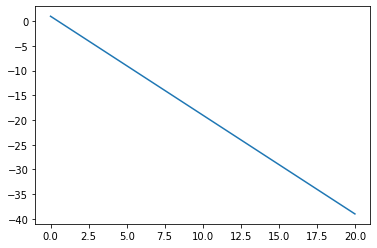

In [5]:
plt.plot(x,y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

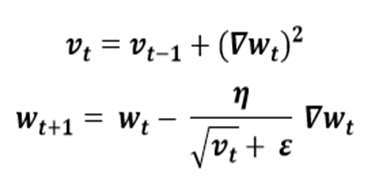

In [122]:
import math
alpha=0.01 
e= 1e-8
i=1000
theta_0=[]
theta_1=[]
loss=[]
H=[]
def Adagrad (x,y,alpha,e,i):
    theta0,theta1=0,0
    Vt01,Vt11=0,0        #Vt0 -1 Vt01
    m=len(x)
    theta_0.append(theta0) 
    theta_1.append(theta1)
    h=theta0+theta1*x
    H.append(h)
    j=np.sum(np.power(h-y, 2))/(2*m)
    loss.append(j)

    for n in range(i):
        h=theta0+theta1*x  
        H.append(h)
        j=np.sum(np.power(h-y, 2))/(2*m)
        loss.append(j)

        g0=np.sum(h-y)/m
        g1=np.sum((h-y)*x)/m
        
        Vt0=Vt01+g0**2
        Vt1=Vt11+g1**2
        theta0=theta0-(alpha/math.sqrt(Vt0+e))*g0  
        theta1=theta1-(alpha/math.sqrt(Vt1+e))*g1 

        theta_0.append(theta0)
        theta_1.append(theta1)

        
    
    return H

Adagrad (x,y,alpha,e,i)
    

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.01      , -0.02052632, -0.03105263, -0.04157895, -0.05210526,
        -0.06263158, -0.07315789, -0.08368421, -0.09421053, -0.10473684,
        -0.11526316, -0.12578947, -0.13631579, -0.14684211, -0.15736842,
        -0.16789474, -0.17842105, -0.18894737, -0.19947368, -0.21      ]),
 array([-0.02      , -0.04105263, -0.06210526, -0.08315789, -0.10421053,
        -0.12526316, -0.14631579, -0.16736842, -0.18842105, -0.20947368,
        -0.23052632, -0.25157895, -0.27263158, -0.29368421, -0.31473684,
        -0.33578947, -0.35684211, -0.37789474, -0.39894737, -0.42      ]),
 array([-0.03      , -0.06157895, -0.09315789, -0.12473684, -0.15631579,
        -0.18789474, -0.21947368, -0.25105263, -0.28263158, -0.31421053,
        -0.34578947, -0.37736842, -0.40894737, -0.44052632, -0.4721052

In [123]:
from sklearn.metrics import r2_score
r2_score(y, H[-1])

0.9997742642842945

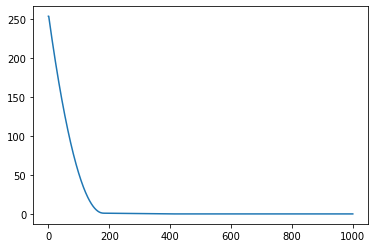

In [98]:
iters=np.linspace(0, 1000, num=1001)
plt.plot(iters,loss)
plt.show()

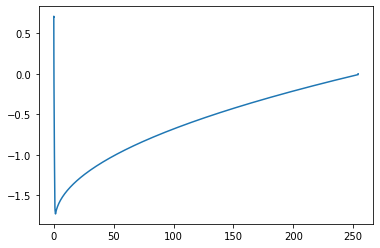

In [99]:
plt.plot(loss,theta_0)
plt.show()

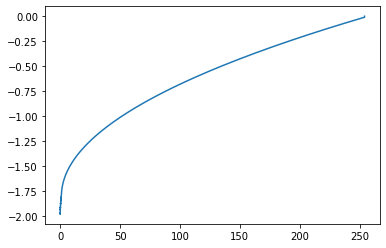

In [100]:
plt.plot(loss,theta_1)
plt.show()

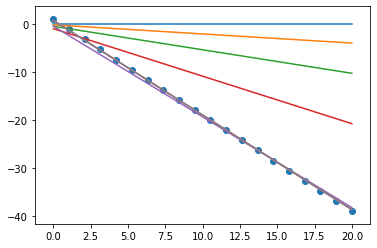

In [101]:
plt.plot(x,H[0])
plt.plot(x,H[20])
plt.plot(x,H[50])
plt.plot(x,H[100])
plt.plot(x,H[300])
plt.plot(x,H[500])
plt.plot(x,H[800])
plt.plot(x,H[1000])

plt.scatter(x,y)

plt.show()


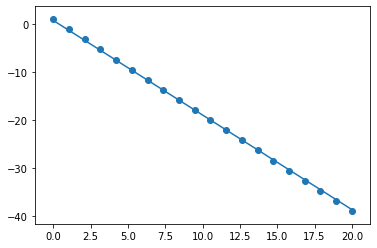

In [102]:
plt.plot(x,H[-1])
plt.scatter(x,y)

plt.show()


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

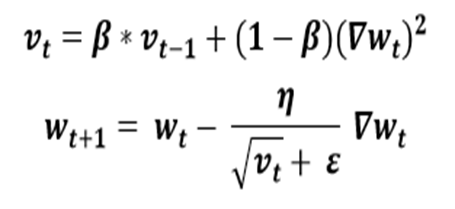

In [124]:
import math
alpha=0.01 
e=1e-8
i=1000
B=0.1 #beta
theta_0=[]
theta_1=[]
loss=[]
H1=[]
def RMSProp(x,y,alpha,e,i,B):
    theta0,theta1=0,0
    Vt01,Vt11=0,0        #Vt0 -1 Vt01
    m=len(x)
    theta_0.append(theta0) #theta0 t
    theta_1.append(theta1)
    h=theta0+theta1*x
    H1.append(h)
    j=np.sum(np.power(h-y, 2))/(2*m)
    loss.append(j)

    for n in range(i):
        h=theta0+theta1*x
        H1.append(h)
        j=np.sum(np.power(h-y, 2))/(2*m)
        loss.append(j)

        g0=np.sum(h-y)/m
        g1=np.sum((h-y)*x)/m

        Vt0=B*Vt01+(1-B)*(g0**2)
        theta0=theta0-(alpha/math.sqrt(Vt0+e))*g0
        #thetat0=thetat01
        
        Vt1=Vt11+g1**2
        theta1=theta1-(alpha/math.sqrt(Vt1+e))*g1
        
        theta_0.append(theta0)
        theta_1.append(theta1)
        print(theta_0 )
        print(theta_1 )
        print(loss)
        print(theta_0[-1])
        print(theta_1[-1])
        
    
    return H1

RMSProp (x,y,alpha,e,i,B)
    

[0, -0.010540925533732379]
[0, -0.009999999999999282]
[254.18421052631578, 254.18421052631578]
-0.010540925533732379
-0.009999999999999282
[0, -0.010540925533732379, -0.021081851067462853]
[0, -0.009999999999999282, -0.019999999999998554]
[254.18421052631578, 254.18421052631578, 251.35504258928395]
-0.021081851067462853
-0.019999999999998554
[0, -0.010540925533732379, -0.021081851067462853, -0.031622776601191394]
[0, -0.009999999999999282, -0.019999999999998554, -0.02999999999999782]
[254.18421052631578, 254.18421052631578, 251.35504258928395, 248.54177815899638]
-0.031622776601191394
-0.02999999999999782
[0, -0.010540925533732379, -0.021081851067462853, -0.031622776601191394, -0.042163702134917956]
[0, -0.009999999999999282, -0.019999999999998554, -0.02999999999999782, -0.03999999999999708]
[254.18421052631578, 254.18421052631578, 251.35504258928395, 248.54177815899638, 245.744417235453]
-0.042163702134917956
-0.03999999999999708
[0, -0.010540925533732379, -0.021081851067462853, -0.03

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.01054093, -0.02106724, -0.03159356, -0.04211987, -0.05264619,
        -0.0631725 , -0.07369882, -0.08422514, -0.09475145, -0.10527777,
        -0.11580408, -0.1263304 , -0.13685672, -0.14738303, -0.15790935,
        -0.16843566, -0.17896198, -0.18948829, -0.20001461, -0.21054093]),
 array([-0.02108185, -0.04213448, -0.06318711, -0.08423975, -0.10529238,
        -0.12634501, -0.14739764, -0.16845027, -0.1895029 , -0.21055554,
        -0.23160817, -0.2526608 , -0.27371343, -0.29476606, -0.31581869,
        -0.33687132, -0.35792396, -0.37897659, -0.40002922, -0.42108185]),
 array([-0.03162278, -0.06320172, -0.09478067, -0.12635962, -0.15793857,
        -0.18951751, -0.22109646, -0.25267541, -0.28425436, -0.3158333 ,
        -0.34741225, -0.3789912 , -0.41057015, -0.44214909, -0.4737280

In [125]:
from sklearn.metrics import r2_score
r2_score(y, H1[-1])

0.9997747015197813

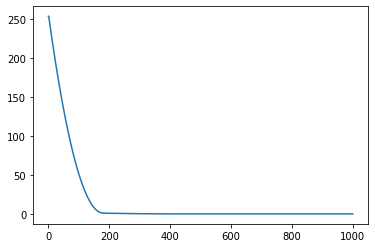

In [105]:
iters=np.linspace(0, 1000, num=1001)
plt.plot(iters,loss)
plt.show()

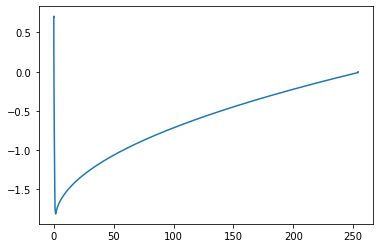

In [106]:
plt.plot(loss,theta_0)
plt.show()

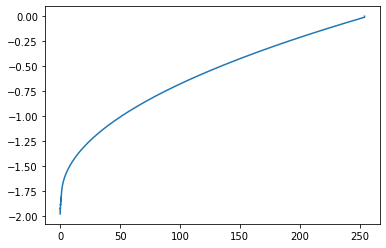

In [107]:
plt.plot(loss,theta_1)
plt.show()

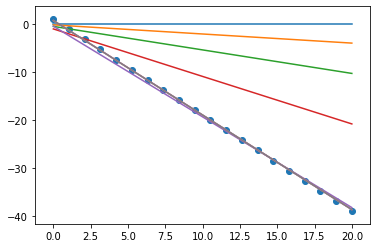

In [108]:
plt.plot(x,H1[0])
plt.plot(x,H1[20])
plt.plot(x,H1[50])
plt.plot(x,H1[100])
plt.plot(x,H1[300])
plt.plot(x,H1[500])
plt.plot(x,H1[800])
plt.plot(x,H1[1000])

plt.scatter(x,y)

plt.show()


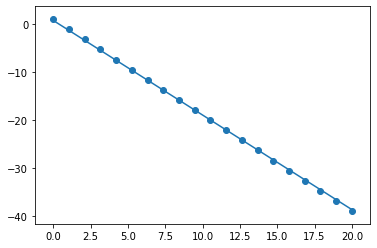

In [109]:
plt.plot(x,H1[-1])
plt.scatter(x,y)

plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

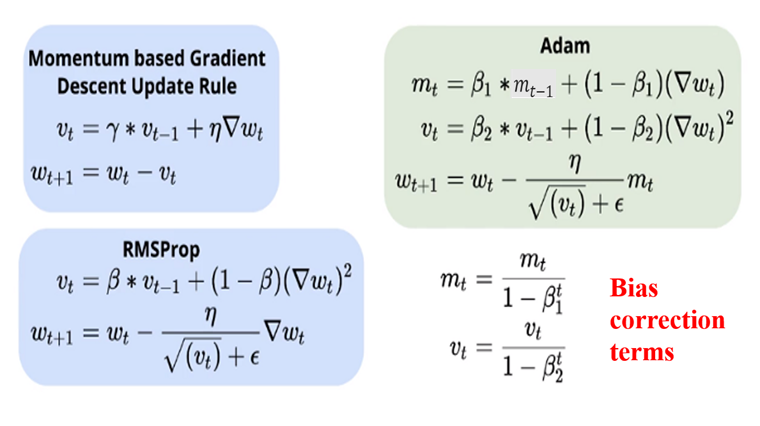

In [126]:
import math
alpha=0.01 
e=1e-8
i=1000
B1=0.1 #beta
B2=0.5
theta_0=[]
theta_1=[]
loss=[]
H2=[]
def adam (x,y,alpha,e,i,B1,B2):
    theta0,theta1=0,0
    Vt01,Vt11=0,0        #Vt0 -1 Vt01
    mt01,mt11=0,0
    m=len(x)
    theta_0.append(theta0) #theta0 t
    theta_1.append(theta1)
    h=theta0+theta1*x
    H2.append(h)
    j=np.sum(np.power(h-y, 2))/(2*m)
    loss.append(j)

    for n in range(i):
        h=theta0+theta1*x
        H2.append(h)
        j=np.sum(np.power(h-y, 2))/(2*m)
        loss.append(j)

        g0=np.sum(h-y)/m
        g1=np.sum((h-y)*x)/m
        
        mt0=B1*mt01+(1-B1)*g0
        Vt0=B2*Vt01+(1-B2)*(g0**2)
        theta0=theta0-(alpha*mt0/(math.sqrt(Vt0)+e))
        
        mt1=B1*mt11+(1-B1)*g1
        Vt1=B2*Vt11+(1-B2)*(g1**2)
        theta1=theta1-(alpha*mt1/(math.sqrt(Vt1)+e))
        
        theta_0.append(theta0)
        theta_1.append(theta1)
    
    return H2

adam (x,y,alpha,e,i,B1,B2)
    

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.01272792, -0.02612573, -0.03952355, -0.05292136, -0.06631917,
        -0.07971699, -0.0931148 , -0.10651261, -0.11991042, -0.13330824,
        -0.14670605, -0.16010386, -0.17350167, -0.18689949, -0.2002973 ,
        -0.21369511, -0.22709293, -0.24049074, -0.25388855, -0.26728636]),
 array([-0.02545584, -0.05225147, -0.07904709, -0.10584272, -0.13263835,
        -0.15943397, -0.1862296 , -0.21302522, -0.23982085, -0.26661647,
        -0.2934121 , -0.32020772, -0.34700335, -0.37379897, -0.4005946 ,
        -0.42739022, -0.45418585, -0.48098148, -0.5077771 , -0.53457273]),
 array([-0.03818377, -0.0783772 , -0.11857064, -0.15876408, -0.19895752,
        -0.23915096, -0.27934439, -0.31953783, -0.35973127, -0.39992471,
        -0.44011815, -0.48031159, -0.52050502, -0.56069846, -0.6008919

In [127]:
from sklearn.metrics import r2_score
r2_score(y, H2[-1])

0.9997006320436846

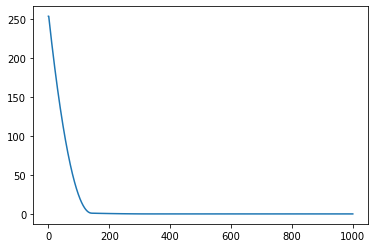

In [118]:
iters=np.linspace(0, 1000, num=1001)
plt.plot(iters,loss)
plt.show()

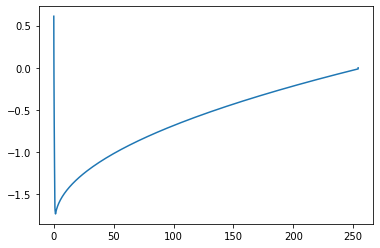

In [119]:
plt.plot(loss,theta_0)
plt.show()

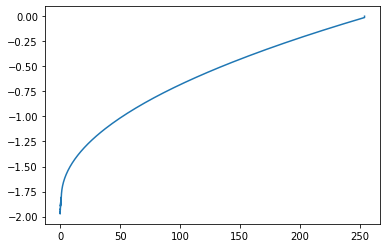

In [120]:
plt.plot(loss,theta_1)
plt.show()

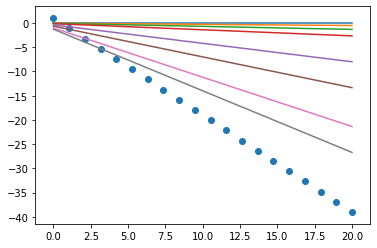

In [60]:
plt.plot(x,H2[0])
plt.plot(x,H2[20])
plt.plot(x,H2[50])
plt.plot(x,H2[100])
plt.plot(x,H2[300])
plt.plot(x,H2[500])
plt.plot(x,H2[800])
plt.plot(x,H2[1000])

plt.scatter(x,y)

plt.show()


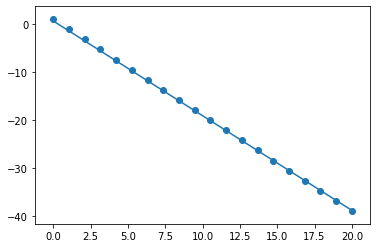

In [121]:
plt.plot(x,H2[-1])
plt.scatter(x,y)

plt.show()

In [9]:
#adam bias corerction 
import math
alpha=0.01 
e=1e-8
i=1000
B1=0.1 #beta
B2=0.5
theta_0=[]
theta_1=[]
loss=[]
H2=[]
def adam2 (x,y,alpha,e,i,B1,B2):
    theta0,theta1=0,0
    Vt01,Vt11=0,0        #Vt0 -1 Vt01
    mt01,mt11=0,0
    m=len(x)
    theta_0.append(theta0) #theta0 t
    theta_1.append(theta1)
    h=theta0+theta1*x
    H2.append(h)
    j=np.sum(np.power(h-y, 2))/(2*m)
    loss.append(j)
    t=1

    for n in range(i):
        h=theta0+theta1*x
        H2.append(h)
        j=np.sum(np.power(h-y, 2))/(2*m)
        loss.append(j)

        g0=np.sum(h-y)/m
        g1=np.sum((h-y)*x)/m
        
        
        mt0=B1*mt01+(1-B1)*g0
        Vt0=B2*Vt01+(1-B2)*(g0**2)
        mt0_c=mt0/(1-B1**t)
        Vt0_c=1/(1-B2**t)
        theta0=theta0-(alpha*mt0_c/(math.sqrt(Vt0_c)+e))
        
        mt1=B1*mt11+(1-B1)*g1
        Vt1=B2*Vt11+(1-B2)*(g1**2)
        mt1_c=mt1/(1-B1**t)
        Vt1_c=1/(1-B2**t)
       
        
        theta1=theta1-(alpha*mt1_c/(math.sqrt(Vt1_c)+e))
        t+=1
        
        theta_0.append(theta0)
        theta_1.append(theta1)
    
    return H2

adam2 (x,y,alpha,e,i,B1,B2)
    

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([ -0.13435029,  -2.09701231,  -4.05967433,  -6.02233635,
         -7.98499837,  -9.94766039, -11.91032242, -13.87298444,
        -15.83564646, -17.79830848, -19.7609705 , -21.72363252,
        -23.68629454, -25.64895657, -27.61161859, -29.57428061,
        -31.53694263, -33.49960465, -35.46226667, -37.42492869]),
 array([ -0.13608518,  -2.15837155,  -4.18065793,  -6.20294431,
         -8.22523069, -10.24751706, -12.26980344, -14.29208982,
        -16.31437619, -18.33666257, -20.35894895, -22.38123532,
        -24.4035217 , -26.42580808, -28.44809446, -30.47038083,
        -32.49266721, -34.51495359, -36.53723996, -38.55952634]),
 array([ -0.13315416,  -2.15034991,  -4.16754567,  -6.18474142,
         -8.20193717, -10.21913292, -12.23632867, -14.25352442,
        -16.27072017, -18.287915

In [10]:
from sklearn.metrics import r2_score
r2_score(y, H2[-1])

0.999980818853263